In [241]:
import json
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

In [3]:
Names = {"10": "Article", "12": "Aux. verb", "18": "Conjunction", "16": "Adverb", \
         "3": "Pers. pron.", "9": "Indef. pron.", "17": "Preposition", "20": "Quantifier"}

In [65]:
list(Names.values())

['Article',
 'Quantifier',
 'Preposition',
 'Aux. verb',
 'Conjunction',
 'Indef. pron.',
 'Adverb',
 'Pers. pron.']

In [74]:
markers = []
for a in range(3):
    markers.append("Aggregated %d"%(a+1))
for x in ['Quantifier','Conjunction','Indef. pron.',\
 'Adverb','Aux. verb','Article','Pers. pron.',\
 'Preposition']:
    markers.append(x)

In [30]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = list(np.floor(np.random.rand(n)*len(X)).astype(int))
    X_resample = np.array(X)[resample_i]
    return X_resample

In [5]:
def get_data(where):

    with open("coordination_on_%s.json"%(where), "r") as f:
         c_o = json.load(f)

    markers = c_o.keys()
    all_users = len(c_o['18'])
    average = {}
    ret = {}
    for m in markers:
        average[m] = np.mean([c for c in c_o[m] if c])
        print(m, np.mean([c for c in c_o[m] if c]), len(c_o[m]))
        ret[Names[m]] = [c for c in c_o[m] if c]
    aggregated = [[], [], []]
    for x in range(all_users):
        cur = []
        cur_2 = []
        cur_3 = []
        valid = 1
        for m in markers:
            if c_o[m][x] == None:
                valid = 0
                cur_2.append(average[m])
            else:
                cur.append(c_o[m][x])
                cur_2.append(c_o[m][x])
                cur_3.append(c_o[m][x])
        if valid:
            aggregated[0].append(np.mean(cur))
        if len(cur) > 0:
            aggregated[1].append(np.mean(cur_2))
            aggregated[2].append(np.mean(cur_3))
    for a in range(3):
        ret['Aggregated %d'%(a+1)] = aggregated[a]
        print(a, np.mean(aggregated[a]), len(aggregated[a]))
    return ret

In [249]:
def get_data(where, what):

    coordination = defaultdict(list)
    utterances = defaultdict(int)
    target_and_speaker = {m: defaultdict(int) for m in Names.keys()}
    speaker = {m: defaultdict(int) for m in Names.keys()}
    target = {m: defaultdict(int) for m in Names.keys()}
    with open("data/%s_coord.json"%(where), "r") as f:
         for line in f:
            data = json.loads(line)
            if not(data['page_title'].startswith(what)):
                continue
            user = data['user_text']
            for m in Names.keys(): 
                t,s = data[m]
                ts = int(t and s) 
                target_and_speaker[m][user] += ts
                target[m][user] += t
                speaker[m][user] += s
            utterances[user] += 1        
    for user in utterances.keys():
        for m in Names.keys():
            try:
                tmp = target_and_speaker[m][user] / target[m][user] - speaker[m][user] / utterances[user]
            except:
                tmp = None
            coordination[m].append(tmp)

    markers = Names.keys()
    all_users = len(utterances.keys())
    average = {}
    ret = {}
    for m in markers:
        average[m] = np.mean([c for c in coordination[m] if c])
        print(m, np.mean([c for c in coordination[m] if c]), len(coordination[m]))
        ret[Names[m]] = [c for c in coordination[m] if c]
    aggregated = [[], [], []]
    for x in range(all_users):
        cur = []
        cur_2 = []
        cur_3 = []
        valid = 1
        for m in markers:
            if coordination[m][x] == None:
                valid = 0
                cur_2.append(average[m])
            else:
                cur.append(coordination[m][x])
                cur_2.append(coordination[m][x])
                cur_3.append(coordination[m][x])
        if valid:
            aggregated[0].append(np.mean(cur))
        if len(cur) > 0:
            aggregated[1].append(np.mean(cur_2))
            aggregated[2].append(np.mean(cur_3))
    for a in range(3):
        ret['Aggregated %d'%(a+1)] = aggregated[a]
        print(a, np.mean(aggregated[a]), len(aggregated[a]))
    return ret

In [250]:
data = {}
data["own"] = get_data("own_page", "User talk")

10 0.0361882998079451 4019
20 0.049860020685078534 4019
17 0.021387293190535447 4019
12 0.03781199201667015 4019
18 0.04826351939100019 4019
9 0.045680244267865516 4019
16 0.04287430629430887 4019
3 0.029033117457025685 4019
0 0.03462841453533696 3663
1 0.03370921200293973 3932
2 0.03205838364875463 3932


In [262]:
data["others_user"] = get_data("reply_on_others", "User talk")
data["others_article"] = get_data("reply_on_others", "Talk")

10 0.010116365935038028 5154
20 0.07939901401367928 5154
17 -0.011056474588597591 5154
12 -0.010434311664671143 5154
18 -0.02510324663572841 5154
9 0.03701969963581702 5154
16 0.057046317843714306 5154
3 -0.0262047161324155 5154
0 0.014012845263931328 4693
1 0.013398195502887449 5035
2 0.012585733561904015 5035
10 0.017353478000846644 5252
20 0.032309338387859335 5252
17 0.010584444003936655 5252
12 0.016765673449973748 5252
18 0.026296908054901643 5252
9 0.020896693903012343 5252
16 0.030033049222412282 5252
3 0.034062211795041146 5252
0 0.022550241930482464 5042
1 0.022350408056103888 5190
2 0.022595826541263683 5190


In [6]:
data = {}
data["own"] = get_data("own")
data["others"] = get_data("others")

10 0.0361882998079451 4019
20 0.04986002068507853 4019
17 0.021387293190535447 4019
12 0.03781199201667015 4019
18 0.04826351939100019 4019
9 0.045680244267865516 4019
16 0.04287430629430887 4019
3 0.029033117457025685 4019
0 0.03462841453533696 3663
1 0.033709212002939734 3932
2 0.03205838364875463 3932
10 0.011529720504685856 5365
20 0.0574931484577312 5365
17 -0.004460995098863284 5365
12 0.00046859881989438115 5365
18 -0.00229089332297819 5365
9 0.02528909294284527 5365
16 0.038650471160140615 5365
3 -0.0016638015735913204 5365
0 0.015791084470530924 5160
1 0.015285750711945415 5317
2 0.015267553922883514 5317


In [265]:
display_name = []
for ind, m in enumerate(markers):
    s, p = scipy.stats.ttest_ind(data["own"][m], data["others_user"][m])#, data["others_article"][m])
    print(m, s, p)
    n = m
    #if p < 0.05:
    #    n += "*"
    #if p < 0.01:
    #    n += "*"
    if p < 0.001:
        n += "*"
    display_name.append(n)

Aggregated 1 10.461308109993945 1.8406893281827595e-25
Aggregated 2 9.612465568549032 8.981901535004185e-22
Aggregated 3 7.080432303012364 1.5433508283646478e-12
Quantifier 6.888419617760318 6.05289437272209e-12
Conjunction 9.916149498437113 4.7770003185003747e-23
Indef. pron. 11.073970136189187 2.671887603466876e-28
Adverb 5.504409321215721 3.815272929948463e-08
Aux. verb 10.815300317872866 4.49316705385051e-27
Article 9.535947489653177 1.9254247237858315e-21
Pers. pron. -2.3904189823822097 0.016852032280329814
Preposition 6.563922408922158 5.579120637936709e-11


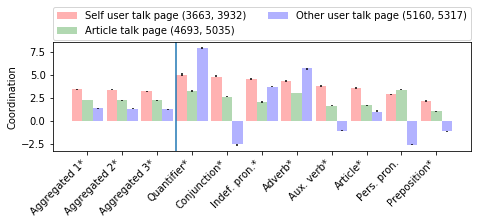

In [297]:
f = plt.figure(figsize=(2,15))
N = len(markers)
all_data = {}
err = {}
for x in ["own", "others_article", "others_user"]:
    all_data[x] = [np.mean(data[x][m])*100 for m in markers]
    err[x] = [[], []]
resample = 20
for ind,m in enumerate(markers):
    lst = {}
    for x in ["own", "others_article", "others_user"]:
        lst[x] = []
        for r in range(resample):
            tmp = bootstrap_resample(data[x][m])
            tmp = np.mean(tmp)*100
            lst[x].append(tmp)
        l, u = scipy.stats.t.interval(0.95, len(lst[x])-1, loc=np.mean(lst[x]), scale=scipy.stats.sem(lst[x]))
        err[x][0].append(all_data[x][ind]-l)
        err[x][1].append(u - all_data[x][ind])
ind = [np.arange(N)]  # the x locations for the groups
width = 0.3       # the width of the bars
ind.append(ind[0] + width)
ind.append(ind[1] + width)

color = ["r", "g", "b"]
fig, ax = plt.subplots(figsize=(7.5, 2))
rect = []
for i, x in enumerate(["own", "others_article", "others_user"]):
    rect.append(ax.bar(ind[i], all_data[x], width, color=color[i], yerr=err[x], alpha=0.3))
# add some text for labels, title and axes ticks
ax.set_ylabel('Coordination')
ax.set_xticks(ind[1])
ax.set_xticklabels(display_name, rotation=45, ha="right")
plt.axvline(x=2.85)
ax.legend((rect[0][0], rect[1][0], rect[2][0]), ('Self user talk page (3663, 3932)', 'Article talk page (4693, 5035)', \
                                                 'Other user talk page (5160, 5317)'), bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           mode="expand", borderaxespad=0., ncol=2)

plt.show()
fig.savefig("coordination.pdf", bbox_inches='tight')

In [170]:
import pandas as pd
import matplotlib.ticker as mtick

In [301]:
df = pd.DataFrame({"Toxic": [28, 4, 6, 9, 4], "Normal": [3, 3, 5, 8, 3], "Severe Toxic": [86, 1, 1, 1, 1]})

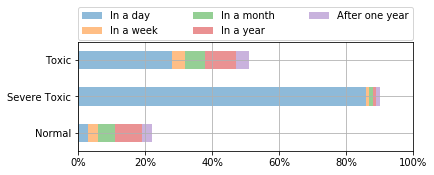

In [302]:
ax = df.T.plot(kind='barh', stacked=True, figsize=(6, 2), alpha=0.5,  edgecolor='none', linewidth=0)
plt.legend(["In a day", "In a week", "In a month", "In a year", "After one year"], bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0.)
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)
plt.grid(True)
#for p in ax.patches:
#ax.annotate(str(int(p.get_width()))+ '%', (p.get_x() + p.get_width()/2-1.5, p.get_height()-0.5))
#plt.axvline(x=28, color="g")
#plt.text(28.2,-0.45,'Normal', color="g")
#plt.axvline(x=64, color="r")
#plt.text(64.2,-0.45,'Toxic', color="r")
plt.xlim((0, 100))
plt.savefig("toxic-deletion.pdf", bbox_inches='tight')